# Delays Without Aging Dataset

* xlsx used is: Finfet15kDelays.xlsx
* converted to DelaysWithoutAging.csv
* Removed an empty row

In [1]:
import pandas as pd
from pandas import read_excel
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error 
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

## Reading csv and shuffling

In [2]:
df_delay=pd.read_csv("../data/DelaysWithoutAging.csv", sep=",")
df_delay = shuffle(df_delay)
df_delay.head(5)

,temp,pvdd,cqload,nbodyn,nsdp,nc0subn,toxpn,hfinp,ni0subp,eotn,...,delay_lh_nodeb_nand2,delay_hl_nodeb_nand2,delay_lh_nodea_nor2,delay_hl_nodea_nor2,delay_lh_nodeb_nor2,delay_hl_nodeb_nor2,delay_lh_nodea_xor2,delay_hl_nodea_xor2,delay_lh_nodeb_xor2,delay_hl_nodeb_xor2
9605,66.891054,0.839932,1.480000e-15,1.040000e+23,2.980000e+26,2.850000e+25,1.370000e-09,2.630000e-08,1.150000e+16,8.230000e-10,...,6.710000e-12,9.090000e-12,5.730000e-12,1.250000e-11,5.980000e-12,1.120000e-11,6.830000e-12,1.080000e-11,5.800000e-12,8.790000e-12
14244,5.713158,0.835437,1.520000e-16,9.550000e+22,2.980000e+26,2.870000e+25,1.350000e-09,2.760000e-08,1.060000e+16,7.940000e-10,...,2.770000e-12,3.490000e-12,2.590000e-12,6.340000e-12,2.240000e-12,4.540000e-12,3.810000e-12,5.470000e-12,2.300000e-12,3.710000e-12
8794,86.245588,0.768273,2.060000e-15,9.900000e+22,2.970000e+26,2.880000e+25,1.380000e-09,2.530000e-08,1.080000e+16,8.410000e-10,...,8.440000e-12,1.200000e-11,7.300000e-12,1.580000e-11,7.540000e-12,1.460000e-11,8.450000e-12,1.390000e-11,7.340000e-12,1.180000e-11
10673,90.096327,0.803184,1.610000e-15,9.940000e+22,2.850000e+26,2.800000e+25,1.430000e-09,2.570000e-08,1.080000e+16,8.020000e-10,...,6.910000e-12,9.540000e-12,5.870000e-12,1.270000e-11,6.170000e-12,1.160000e-11,6.970000e-12,1.120000e-11,5.980000e-12,9.280000e-12
13909,-15.503535,0.794400,1.660000e-15,9.730000e+22,3.010000e+26,2.850000e+25,1.320000e-09,2.500000e-08,1.040000e+16,8.080000e-10,...,8.810000e-12,1.070000e-11,7.680000e-12,1.510000e-11,7.510000e-12,1.370000e-11,8.990000e-12,1.290000e-11,7.290000e-12,9.820000e-12


## Setting global variables (train/val lengths & input/output columns)

In [3]:
print(len(df_delay))
train_length = int(0.8*len(df_delay))
val_length = len(df_delay) - train_length
print(train_length, val_length)

input_columns=20
output_columns=16

14996
11996 3000


## Creating training dataset

In [27]:
dataset_delay = df_delay.values
X_delay = dataset_delay[:train_length,0:input_columns]
y_delay = dataset_delay[:train_length,input_columns:]

## Data analysation using Correlation Maps

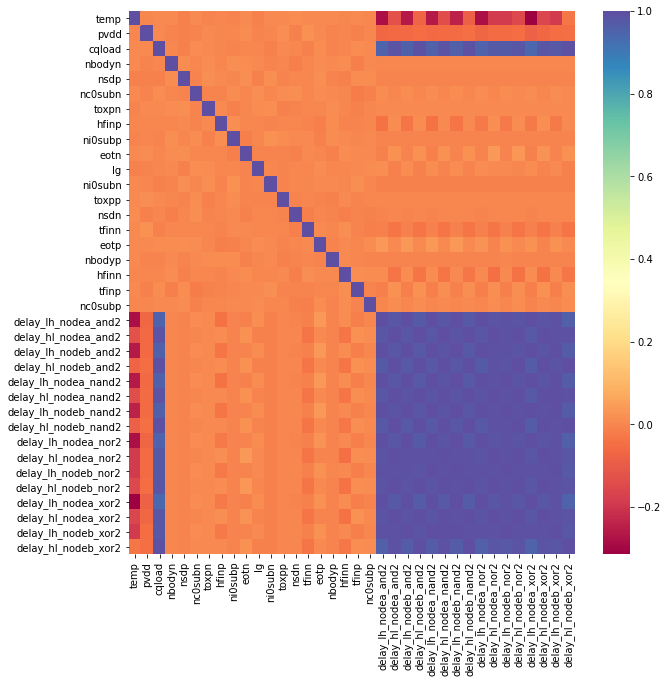

In [6]:
plt.figure(figsize=(10,10))
cor = df_delay.corr()
sns.heatmap(cor, cmap=plt.cm.Spectral)
plt.show()

## Data analysation using Spearmans/Pearsons coefficients

In [7]:
for j in range(output_columns):
    print(df_delay.columns[input_columns+j])
    print()
    for i in range(input_columns):
        corr1, _ = spearmanr(X_delay[:,i], y_delay[:,j])
        corr2, _ = pearsonr(X_delay[:,i], y_delay[:,j])
        if(abs(corr1)> 0.05 or abs(corr2)> 0.05 ):
            print(df_delay.columns[i]+":\t",'Spearmans correlation: %.3f' % abs(corr1), 'Pearsons correlation: %.3f' % abs(corr2) )
    print()

delay_lh_nodea_and2

temp:	 Spearmans correlation: 0.262 Pearsons correlation: 0.282
pvdd:	 Spearmans correlation: 0.059 Pearsons correlation: 0.065
cqload:	 Spearmans correlation: 0.955 Pearsons correlation: 0.949

delay_hl_nodea_and2

temp:	 Spearmans correlation: 0.121 Pearsons correlation: 0.127
pvdd:	 Spearmans correlation: 0.057 Pearsons correlation: 0.060
cqload:	 Spearmans correlation: 0.987 Pearsons correlation: 0.986

delay_lh_nodeb_and2

temp:	 Spearmans correlation: 0.244 Pearsons correlation: 0.263
pvdd:	 Spearmans correlation: 0.056 Pearsons correlation: 0.061
cqload:	 Spearmans correlation: 0.960 Pearsons correlation: 0.955

delay_hl_nodeb_and2

temp:	 Spearmans correlation: 0.075 Pearsons correlation: 0.079
cqload:	 Spearmans correlation: 0.993 Pearsons correlation: 0.992

delay_lh_nodea_nand2

temp:	 Spearmans correlation: 0.242 Pearsons correlation: 0.261
pvdd:	 Spearmans correlation: 0.055 Pearsons correlation: 0.060
cqload:	 Spearmans correlation: 0.961 Pearsons cor

## Data scaling

In [8]:
scalarX_delay, scalarY_delay = MinMaxScaler(), MinMaxScaler()
scalarX_delay.fit(X_delay)
scalarY_delay.fit(y_delay.reshape(train_length,output_columns))
X_delay = scalarX_delay.transform(X_delay)
y_delay = scalarY_delay.transform(y_delay.reshape(train_length,output_columns))

## Training the model

In [21]:
model_delay = Sequential()
model_delay.add(Dense(32, input_dim=input_columns, activation='relu'))
model_delay.add(Dense(64,activation='relu'))
model_delay.add(Dense(128,activation='relu'))
model_delay.add(Dense(256,activation='relu'))
model_delay.add(Dense(64, activation='relu'))
model_delay.add(Dense(output_columns, activation='linear'))
model_delay.compile(loss='mse', optimizer='adam')
output = model_delay.fit(X_delay, y_delay, epochs=500, verbose=1)

Epoch 1/500
375/375 [==============================] - 0s 793us/step - loss: 0.0089
Epoch 2/500
375/375 [==============================] - 0s 798us/step - loss: 2.1354e-04
Epoch 3/500
375/375 [==============================] - 0s 832us/step - loss: 1.2400e-04
Epoch 4/500
375/375 [==============================] - 0s 897us/step - loss: 9.7714e-05
Epoch 5/500
375/375 [==============================] - 0s 910us/step - loss: 7.3940e-05
Epoch 6/500
375/375 [==============================] - 0s 900us/step - loss: 8.7862e-05
Epoch 7/500
375/375 [==============================] - 0s 817us/step - loss: 5.5582e-05
Epoch 8/500
375/375 [==============================] - 0s 906us/step - loss: 5.4651e-05
Epoch 9/500
375/375 [==============================] - 0s 778us/step - loss: 5.2341e-05
Epoch 10/500
375/375 [==============================] - 0s 777us/step - loss: 5.6803e-05
Epoch 11/500
375/375 [==============================] - 0s 914us/step - loss: 7.0891e-05
Epoch 12/500
375/375 [============

375/375 [==============================] - 0s 968us/step - loss: 1.5925e-05
Epoch 185/500
375/375 [==============================] - 0s 994us/step - loss: 7.6634e-06
Epoch 186/500
375/375 [==============================] - 0s 988us/step - loss: 9.7931e-06
Epoch 187/500
375/375 [==============================] - 0s 976us/step - loss: 1.0235e-05
Epoch 188/500
375/375 [==============================] - 0s 988us/step - loss: 1.1084e-05
Epoch 189/500
375/375 [==============================] - 0s 951us/step - loss: 8.3353e-06
Epoch 190/500
375/375 [==============================] - 0s 845us/step - loss: 1.2132e-05
Epoch 191/500
375/375 [==============================] - 0s 1ms/step - loss: 1.0734e-05
Epoch 192/500
375/375 [==============================] - 0s 1ms/step - loss: 1.0699e-05
Epoch 193/500
375/375 [==============================] - 0s 1ms/step - loss: 8.8649e-06
Epoch 194/500
375/375 [==============================] - 0s 1ms/step - loss: 1.1464e-05
Epoch 195/500
375/375 [=========

375/375 [==============================] - 0s 855us/step - loss: 6.5851e-06
Epoch 367/500
375/375 [==============================] - 0s 866us/step - loss: 1.2026e-05
Epoch 368/500
375/375 [==============================] - 0s 846us/step - loss: 7.2867e-06
Epoch 369/500
375/375 [==============================] - 0s 844us/step - loss: 6.3340e-06
Epoch 370/500
375/375 [==============================] - 0s 862us/step - loss: 9.2690e-06
Epoch 371/500
375/375 [==============================] - 0s 847us/step - loss: 7.5487e-06
Epoch 372/500
375/375 [==============================] - 0s 877us/step - loss: 5.9395e-06
Epoch 373/500
375/375 [==============================] - 0s 871us/step - loss: 6.9272e-06
Epoch 374/500
375/375 [==============================] - 0s 877us/step - loss: 7.5404e-06
Epoch 375/500
375/375 [==============================] - 0s 873us/step - loss: 1.3969e-05
Epoch 376/500
375/375 [==============================] - 0s 884us/step - loss: 6.4407e-06
Epoch 377/500
375/375 [=

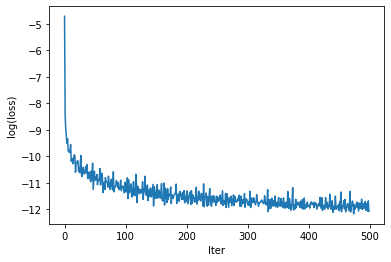

In [22]:
plt.plot(range(0,500),np.log(output.history['loss']))
plt.xlabel("Iter")
plt.ylabel("log(loss)")
plt.show()

## Predictions

In [23]:
X_test_delay = dataset_delay[train_length:,0:input_columns]
y_test_delay = dataset_delay[train_length:,input_columns:]

X_test_delay = scalarX_delay.transform(X_test_delay)
y_testpred_delay = model_delay.predict(X_test_delay)
y_testpred2_delay = scalarY_delay.inverse_transform(y_testpred_delay)

y_trainpred_delay = model_delay.predict(X_delay)
y_trainpred2_delay = scalarY_delay.inverse_transform(y_trainpred_delay)

y_2_delay = scalarY_delay.inverse_transform(y_delay)

## Model Evaluation

In [24]:
for i in range(output_columns):
    r2_train = r2_score(y_trainpred2_delay[:,i], y_2_delay[:,i])
    r2_test = r2_score(y_testpred2_delay[:,i], y_test_delay[:,i])
    print("Train R2 Score for "+df_delay.columns[input_columns+i]+" : "+str(r2_train))
    print("Test  R2 Score for "+df_delay.columns[input_columns+i]+" : "+str(r2_test))
    print()

Train R2 Score for delay_lh_nodea_and2 : 0.9999109249475201
Test  R2 Score for delay_lh_nodea_and2 : 0.9998970733675425

Train R2 Score for delay_hl_nodea_and2 : 0.9998867351319344
Test  R2 Score for delay_hl_nodea_and2 : 0.9998731857959633

Train R2 Score for delay_lh_nodeb_and2 : 0.9998042557274693
Test  R2 Score for delay_lh_nodeb_and2 : 0.9998025742908991

Train R2 Score for delay_hl_nodeb_and2 : 0.9998492040258311
Test  R2 Score for delay_hl_nodeb_and2 : 0.9998393844917703

Train R2 Score for delay_lh_nodea_nand2 : 0.999890389111246
Test  R2 Score for delay_lh_nodea_nand2 : 0.9998762319068519

Train R2 Score for delay_hl_nodea_nand2 : 0.9999065393300429
Test  R2 Score for delay_hl_nodea_nand2 : 0.9999013251167415

Train R2 Score for delay_lh_nodeb_nand2 : 0.9998749984329264
Test  R2 Score for delay_lh_nodeb_nand2 : 0.9998626216826606

Train R2 Score for delay_hl_nodeb_nand2 : 0.9998671355067488
Test  R2 Score for delay_hl_nodeb_nand2 : 0.9998591423526992

Train R2 Score for delay_

In [25]:
sum=0
count=0
for i in range(train_length):
    for j in range(output_columns):        
        error = abs(y_trainpred2_delay[i,j] - y_2_delay[i,j])/(y_2_delay[i,j])
#         if(i==32 and count<5):
#             print(i,j, y_trainpred2_delay[i,j],y_2_delay[i,j],error*100)
#             count+=1
        sum+=error
print("Mean Train error: {:.2f} %".format(sum/(train_length*output_columns) * 100))

Mean Train error: 0.36 %


In [26]:
sum=0
count=0
for i in range(val_length):
    for j in range(output_columns):  
        error = abs(y_testpred2_delay[i,j] - y_test_delay[i,j])/(y_test_delay[i,j])
        sum+=error    
print("Mean Test error: {:.2f} %".format(sum/(val_length*output_columns) * 100))

Mean Test error: 0.37 %
